**This script is for data visualization**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# raw data
with open('nba_stats.csv', 'r') as f:
    data = pd.read_csv(f)
# transform W/L as 1/0 form
data['W/L'] = [1 if i == 'W' else 0 for i in data['W/L']]
print(data.keys())

Index(['TEAM', 'DATE', 'MATCHUP', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', '+/-'],
      dtype='object')


In [2]:
# print out the name of 30 nba teams
print(data['TEAM'].unique())

['UTA' 'SAS' 'SAC' 'POR' 'PHI' 'ORL' 'OKC' 'NYK' 'MIN' 'MIL' 'MIA' 'MEM'
 'LAC' 'IND' 'GSW' 'DET' 'DEN' 'DAL' 'CHI' 'CHA' 'BKN' 'ATL' 'WAS' 'TOR'
 'PHX' 'NOP' 'LAL' 'HOU' 'CLE' 'BOS' 'NOH' 'NJN' 'SEA' 'NOK' 'CHH' 'VAN']


**Each of the name represents:<br>
UTA: Utah Jazz <br>
SAS: San Antonio Spurs <br>
SAC: Sacramento Kings <br>
POR: Portland Trail Blazers <br>
PHI: Philadelphia 76ers <br>
ORL: Orlando Magic <br>
OKC: Oklahoma City Thunder <br>
NYK: Ner York Knicks <br>
MIN: Minnesota Timberwolves <br>
MIL: Milwaukee Bucks <br>
MIA: Miami Heat <br>
MEM: Menphis Grizzlies <br>
LAC: Los Angeles Clippers <br>
IND: Indiana Pacers <br>
GSW: Golden State Warriors <br>
DET: Detroit Pistons <br>
DEN: Denver Nuggets <br>
DAL: Dallas Mavericks <br>
CHI: Chicago Bulls <br>
CHA: Charlotte Hornets <br>
BKN: Brooklyn Nets <br>
ATL: Atlanta Hawks <br>
WAS: Washington Wizards <br>
TOR: Toronto Raptors <br>
PHX: Phoenix Suns <br>
NOP: New Orleans Pelicans <br>
LAL: Los Angeles Lakers <br>
HOU: Houston Rockets <br>
CLE: Cleveland Cavaliers <br>
BOS: Boston Celtics <br>
(Previous teams)<br> 
NOH: New Orleans Hornets (now NOP)<br>
NJN: New Jersey Nets (now BKN) <br>
SEA: Seattle SuperSonics (now OKC)<br>
NOK: Norwgian Krone (not an nba team)<br>
CHH: Charlotte Hornets (now CHA)<br>
VAN: Vancouver Titans (not an nba team)<br>**

For simplicity we just want to do experiments on several teams other than each team. Due to historical reason, W/L banlance and personal emotions, we decide to carry visualization on SAS, CLE, GSW, ORL, BOS, and LAL. 

In [3]:
# Plot the winning rate of each team

# match year tag
class Stats(object):
    """
    winning_rate(team): function to calculate winning rate of each team
    plot_single(team): function to plot winning rate curve
    plot_multiple(teams): plot multiple curves on a single figure by given list of teams
    """
    def __init__(self, data, period=None):
        self.data = data
        self.stats = {}
        if period == None:
            self.period = range(2000, 2019)
        else:
            self.period = period
        
    def winning_rate(self, team):
        """
        calculate the winning rate of given team from 2000-2018
        """
        if team in self.stats.keys():
            return self.stats[team]
        
        team_data = self.data[self.data['TEAM']==team]
        wins = {}
        total = {}
        win_r = {}
        for i in self.period:
            wins[i] = 0
            total[i] = 0
            win_r[i] = 0.0

        for i, d in team_data.iterrows():
            month, day, year = d['DATE'].split('/')
            month = int(month)
            year = int(year)
            
            if month <= 5:
                total[year-1] += 1
                if d['W/L'] == 1:
                    wins[year-1] += 1
            else:
                total[year] += 1
                if d['W/L'] == 1:
                    wins[year] += 1
        
        for key in wins.keys():
            win_r[key] = wins[key] / total[key] * 100
        
        self.stats[team] = (wins, total, win_r)
        
        return wins, total, win_r
    
    def plot_single(self, team):
        if team not in self.stats.keys():
            raise Exception("Statistics of team {} haven't been calculated yet."
                            .format(team))
        
        _, _, win_r = self.stats[team]
        values = [win_r[key] for key in win_r.keys()]
        plt.plot(self.period, values)

        plt.xticks(np.arange(2000, 2019, 3))
        plt.title('Wining rate of {} during season 2000-2018'.format(team))
        plt.xlabel('Year')
        plt.ylabel('Wining Rate(%)')
        plt.grid()
        plt.show()
    
    def plot_multiple(self, teams):
        for team in teams:
            if team not in self.stats.keys():
                raise Exception("Statistics of team {} haven't been calculated yet."
                                .format(team))
            
            _, _, win_r = self.stats[team]
            values = [win_r[key] for key in win_r.keys()]
            plt.plot(self.period, values)
            
        plt.xticks(np.arange(2000, 2019, 3))
        plt.title('Winning rate curve during season 2000-2018')
        plt.xlabel('Year')
        plt.ylabel('Wining Rate(%)')
        plt.legend(teams)
        plt.grid()
        plt.show()
    
    def _range(self, team=None, filt='PG%'):
        if team:
            data = self.data[self.data['TEAM']==team]
        else:
            data = self.data
            
        return np.min(data[filt], axis=0), np.max(data[filt], axis=0)
    
    def _filtered_wr(self, team=None, filt='PG%', thresh=30):
        if team:
            data = self.data[self.data['TEAM']==team]
        else:
            data = self.data
            
        filtered_data = data[data[filt] >= thresh]
        win_r = np.sum(filtered_data['W/L']) / filtered_data.shape[0]
        
        return win_r
    
    
        
stats = Stats(data) 

Winning rate curves of East region:


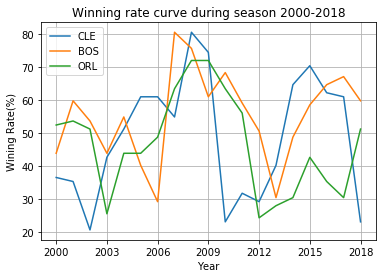

Winning rate curves of West region:


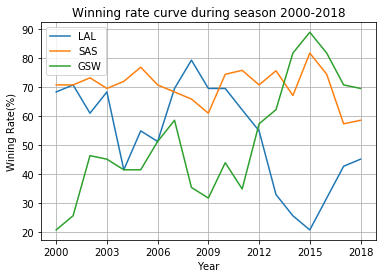

In [5]:
teams = ['LAL', 'CLE', 'SAS', 'GSW', 'ORL', 'BOS']
for team in teams:
    lal_w, lal_t, lal_r = stats.winning_rate(team)

print("Winning rate curves of East region:")
stats.plot_multiple(['CLE', 'BOS', 'ORL'])
print("Winning rate curves of West region:")
stats.plot_multiple(['LAL', 'SAS', 'GSW'])

In [6]:
tags = 'FGM'
d = {}
#for tag in tags:
th_min, th_max = stats._range(filt=tags)
thresh = np.linspace(th_min, th_max, 50)
d['range'] = thresh

for team in teams:
    l = []
    for th in thresh:
        win_r = stats._filtered_wr(team, tags, th)
        l.append(win_r)
    d[team] = l


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in long_scalars


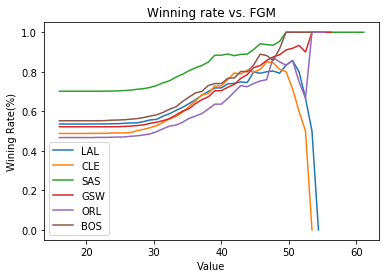

In [7]:
for team in teams:
    values = d[team]
    plt.plot(d['range'], values)
            
    plt.title('Winning rate vs. {}'.format(tags))
    plt.xlabel('Value')
    plt.ylabel('Wining Rate(%)')
    plt.legend(teams)
    plt.grid()

plt.show()

**Before classification, we want to do a t-sne visualization to see if our data is separable:**

In [34]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def norm(data):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    return data


def t_sne(data_vec, data_label, n_components):
    if n_components == 2:
        tsne_digits = TSNE(n_components=n_components, perplexity=40, n_iter=500).fit_transform(data_vec)
        plt.figure()
        plt.scatter(tsne_digits[:, 0], tsne_digits[:, 1], c=data_label)
        plt.title("T-SNE 2-D Visualization")
        
    elif n_components == 3:
        tsne_digits = TSNE(n_components=n_components, perplexity=40, n_iter=500).fit_transform(data_vec)
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(tsne_digits[:, 0], tsne_digits[:, 1], tsne_digits[:, 2], c=data_label)
        plt.title("T-SNE 3-D Visualization")
    else:
        raise Exception("Wrong number of components! n_components can only be 2 or 3!(Got {} instead)."
                        .format(n_components))

    plt.show()

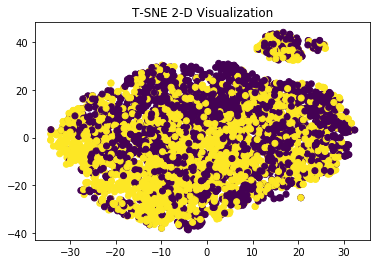

In [37]:
random_data = data.sample(frac=1.0)
drop_list = ['TEAM', 'DATE', 'MATCHUP', 'PTS', '+/-']
data_vis = random_data.drop(drop_list, axis=1)
data_vec = data_vis.drop('W/L', axis=1)
data_label = data_vis['W/L']
data_vec = np.array(data_vec)

t_sne(data_vec[:5000, :], data_label[:5000], 2)

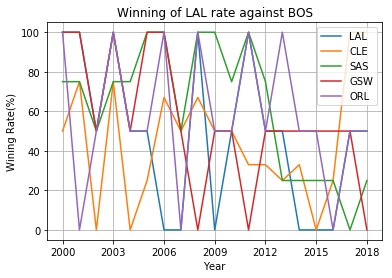

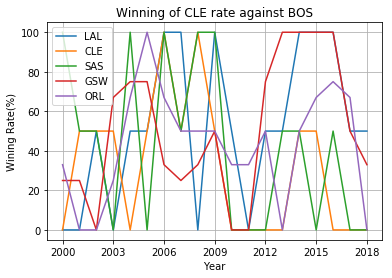

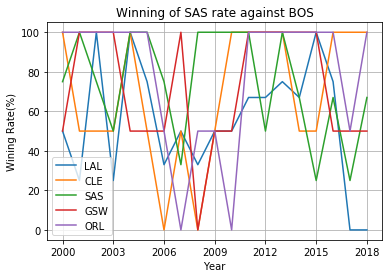

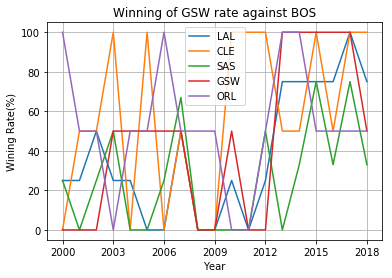

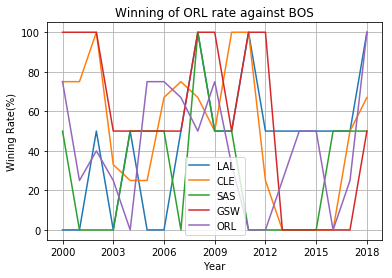

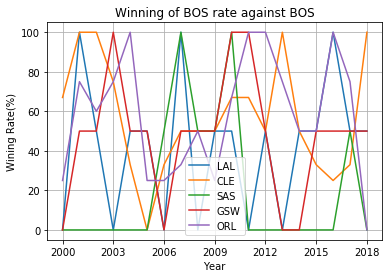

In [8]:
with open('WinningRates.csv', 'r') as f:
    matchup = pd.read_csv(f)
    
teams = ['LAL', 'CLE', 'SAS', 'GSW', 'ORL', 'BOS']
duration = [i for i in range(2000, 2019)]

for t1 in teams:
    d1 = matchup[matchup['Team']==t1]
    for t2 in teams:
        if t1 == t2:
            continue
        d2 = d1[d1['Opponent']==t2]
        value = np.array(d2['Win_Rate'])
        plt.plot(duration, value*100)
        
    plt.xticks(np.arange(2000, 2019, 3))
    plt.title('Winning of {} rate against {}'.format(t1, t2))
    plt.xlabel('Year')
    plt.ylabel('Wining Rate(%)')
    plt.legend(teams)
    plt.grid()
    plt.show()